# Chartbuster Prediction
To Predict Popularity of a song based on the Number of Views

### Importing the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor

In [6]:
data= pd.read_csv("Data_Train.csv")
data.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [7]:
data.shape

(78458, 11)

### Analysing Datatypes of features

In [8]:
data.dtypes

Unique_ID      int64
Name          object
Genre         object
Country       object
Song_Name     object
Timestamp     object
Views          int64
Comments       int64
Likes         object
Popularity    object
Followers      int64
dtype: object

### Identifying if any Null Values are present in the Data

In [9]:
data.isnull().sum()

Unique_ID     0
Name          0
Genre         0
Country       0
Song_Name     1
Timestamp     0
Views         0
Comments      0
Likes         0
Popularity    0
Followers     0
dtype: int64

### Finding the Genres  present with their counts

In [10]:
data['Genre'].value_counts()

danceedm                22633
electronic              18331
all-music               10277
rbsoul                   5411
latin                    4562
trap                     4055
rock                     4000
deephouse                2423
pop                      1787
dubstep                  1100
ambient                   847
classical                 767
drumbass                  671
metal                     523
disco                     374
country                   336
alternativerock           156
hiphoprap                 100
reggaeton                  55
folksingersongwriter       39
indie                      11
Name: Genre, dtype: int64

### Analysing the 'Country' feature

In [11]:
data['Country'].value_counts()

AU    78458
Name: Country, dtype: int64

### Analysing the Various Artists

In [12]:
data['Name'].value_counts()

Mixmag           2065
Monstercat       1425
GR6 EXPLODE      1400
Hardstyle        1124
Sweet Musique     984
                 ... 
Alex Grey           1
KENNIE              1
Mako                1
Jhay Cortez         1
essri               1
Name: Name, Length: 1209, dtype: int64

### Analysing the 'Timestamp' Feature

In [13]:
data['Timestamp']= pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')

In [14]:
data['Year']= data['Timestamp'].dt.year
data['Year'].head(5)

0    2018
1    2016
2    2015
3    2017
4    2016
Name: Year, dtype: int64

In [15]:
data['Month']= data['Timestamp'].dt.month
data['Month'].head(5)

0    3
1    6
2    5
3    6
4    9
Name: Month, dtype: int64

### Since it is observed that there is only one unique country, we can drop the Feature. Also, 'Unique_ID','Timestamp' features will not contribute to the Model, hence it can be dropped

In [16]:
data.drop(['Country','Unique_ID','Timestamp'],inplace=True,axis=1)

In [17]:
data.head()

,Name,Genre,Song_Name,Views,Comments,Likes,Popularity,Followers,Year,Month
0,Hardstyle,danceedm,N-Vitral presents BOMBSQUAD - Poison Spitter (...,14017,4,499,97,119563,2018,3
1,Dj Aladdin,danceedm,Dj Aladdin - Old School Hip Hop Quick Mix,1918,17,49,17,2141,2016,6
2,Maxximize On Air,danceedm,Maxximize On Air - Mixed by Blasterjaxx - Epis...,9668,11,312,91,22248,2015,5
3,GR6 EXPLODE,rbsoul,MC Yago - Tenho Compromisso (DJ R7),113036,2,"2,400",76,393655,2017,6
4,Tritonal,danceedm,Escape (feat. Steph Jones),110024,81,"3,031",699,201030,2016,9


### Since 'Song_Name' also would not contribute to the Algorithm, it is also dropped

In [18]:
data.drop(['Song_Name'],inplace=True,axis=1)

In [19]:
data.head()

,Name,Genre,Views,Comments,Likes,Popularity,Followers,Year,Month
0,Hardstyle,danceedm,14017,4,499,97,119563,2018,3
1,Dj Aladdin,danceedm,1918,17,49,17,2141,2016,6
2,Maxximize On Air,danceedm,9668,11,312,91,22248,2015,5
3,GR6 EXPLODE,rbsoul,113036,2,"2,400",76,393655,2017,6
4,Tritonal,danceedm,110024,81,"3,031",699,201030,2016,9


### Cleaning the 'Likes' column and converting to int dtype

In [21]:
data['Likes']= data['Likes'].str.replace(',','')
data['Likes']= data['Likes'].str.replace('.','')
data['Likes']= data['Likes'].str.replace('K','')
data['Likes']= data['Likes'].str.replace('M','')

In [22]:
data['Likes']= data['Likes'].astype('int')

### Cleaning the 'Popularity' column and converting to int dtype

In [23]:
data['Popularity']= data['Popularity'].str.replace(',','')
data['Popularity']= data['Popularity'].str.replace('.','')
data['Popularity']= data['Popularity'].str.replace('K','')

In [24]:
data['Popularity']= data['Popularity'].astype('int')

### Analysing the correlation between features

In [25]:
Matrix=data.corr()
Matrix

,Views,Comments,Likes,Popularity,Followers,Year,Month
Views,1.000000,0.679104,-0.033708,0.164999,0.103603,-0.009043,0.002601
Comments,0.679104,1.000000,0.016417,0.167291,0.085034,-0.007455,0.004098
Likes,-0.033708,0.016417,1.000000,0.133275,0.058949,0.037965,0.024285
Popularity,0.164999,0.167291,0.133275,1.000000,0.139280,-0.038899,0.008377
Followers,0.103603,0.085034,0.058949,0.139280,1.000000,-0.180333,-0.003490
Year,-0.009043,-0.007455,0.037965,-0.038899,-0.180333,1.000000,-0.004072
Month,0.002601,0.004098,0.024285,0.008377,-0.003490,-0.004072,1.000000


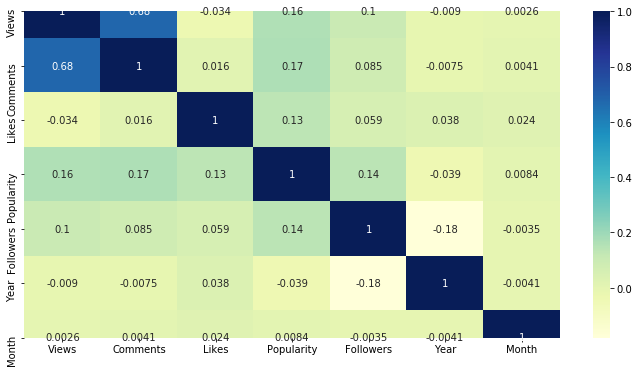

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(Matrix,annot=True,cmap="YlGnBu",)

### Analysing the relationship between Comments & Views Feature 

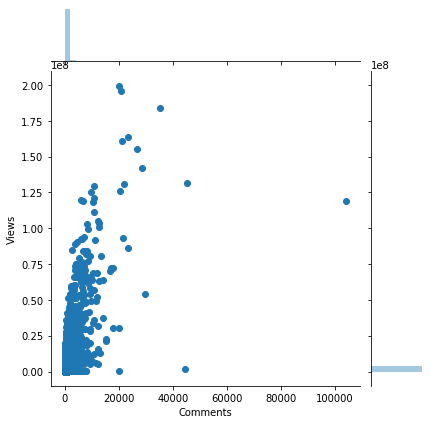

In [27]:
sns.jointplot(data['Comments'],data['Views'])

### Checking the Skewness in Data

In [28]:
data.skew()

Views         21.426371
Comments      54.946169
Likes          2.351534
Popularity     4.241713
Followers      4.434492
Year          -3.528556
Month         -0.069672
dtype: float64

### Transforming the Features to reduce skewness

In [31]:
data['Views1']= np.log(data['Views']+1)
data['Comments1']= np.log(data['Comments']+1)
data['Popularity1']=np.log(data['Popularity']+1)
data['Followers1']=np.log(data['Followers']+1)
data['Likes1']=(data['Likes'])**(1/3)

### Skewness Post Transformation

In [32]:
data.skew()

Views          21.426371
Comments       54.946169
Likes           2.351534
Popularity      4.241713
Followers       4.434492
Year           -3.528556
Month          -0.069672
Views1         -0.691691
Comments1       0.342899
Popularity1    -0.194574
Followers1     -0.665682
Likes1          0.627549
dtype: float64

### Analysing the Data Distributions Post Transformation

(array([1.8700e+02, 3.4000e+01, 2.4000e+01, 6.8000e+01, 2.8800e+02,
        2.8900e+02, 1.2280e+03, 8.2170e+03, 2.8248e+04, 3.9860e+04]),
 array([1990., 1993., 1996., 1999., 2002., 2005., 2008., 2011., 2014.,
        2017., 2020.]),
 <a list of 10 Patch objects>)

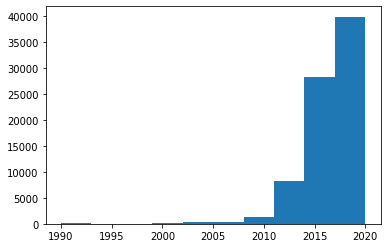

In [29]:
plt.hist(data['Year'],range=(1990,2020))

(array([ 1334.,   455.,  2370.,  7077., 19325., 25781., 14726.,  5587.,
         1595.,   208.]),
 array([ 0.        ,  1.91108484,  3.82216968,  5.73325452,  7.64433936,
         9.5554242 , 11.46650904, 13.37759388, 15.28867872, 17.19976356,
        19.1108484 ]),
 <a list of 10 Patch objects>)

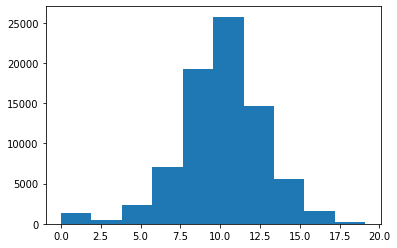

In [33]:
plt.hist(data['Views1'],bins=10)

(array([ 6221., 10587., 15920., 14044., 10288.,  7374.,  5212.,  3841.,
         2889.,  2082.]),
 array([ 0.        ,  2.15436287,  4.30872575,  6.46308862,  8.61745149,
        10.77181437, 12.92617724, 15.08054011, 17.23490299, 19.38926586,
        21.54362873]),
 <a list of 10 Patch objects>)

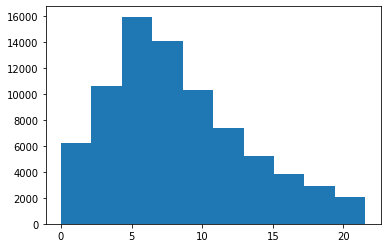

In [34]:
plt.hist(data['Likes1'],bins=10)

(array([2.3622e+04, 1.2505e+04, 1.4501e+04, 1.3866e+04, 9.0210e+03,
        3.3960e+03, 1.2140e+03, 2.8500e+02, 4.4000e+01, 4.0000e+00]),
 array([ 0.        ,  1.15529439,  2.31058879,  3.46588318,  4.62117757,
         5.77647197,  6.93176636,  8.08706076,  9.24235515, 10.39764954,
        11.55294394]),
 <a list of 10 Patch objects>)

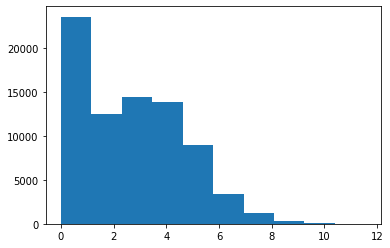

In [35]:
plt.hist(data['Comments1'],bins=10)

(array([ 9002.,  5203.,  6353.,  8431., 12177., 12936., 10400.,  7202.,
         4480.,  2274.]),
 array([0.        , 0.92103404, 1.84206807, 2.76310211, 3.68413615,
        4.60517019, 5.52620422, 6.44723826, 7.3682723 , 8.28930633,
        9.21034037]),
 <a list of 10 Patch objects>)

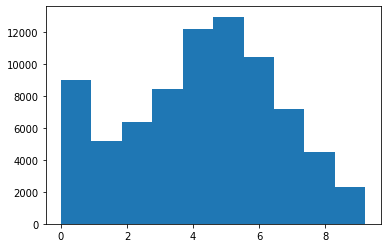

In [36]:
plt.hist(data['Popularity1'],bins=10)

(array([  110.,   445.,  1265.,  3555.,  5502.,  9742., 19915., 20727.,
        13207.,  3990.]),
 array([ 0.69314718,  2.23351072,  3.77387425,  5.31423779,  6.85460132,
         8.39496486,  9.93532839, 11.47569193, 13.01605546, 14.556419  ,
        16.09678253]),
 <a list of 10 Patch objects>)

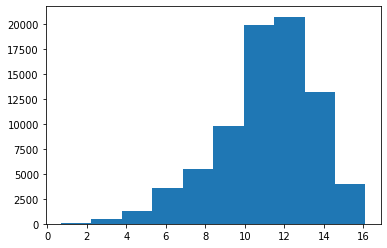

In [37]:
plt.hist(data['Followers1'],bins=10)

### Dropping the Features we no longer need

In [38]:
data.columns

Index(['Name', 'Genre', 'Views', 'Comments', 'Likes', 'Popularity',
       'Followers', 'Year', 'Month', 'Views1', 'Comments1', 'Popularity1',
       'Followers1', 'Likes1'],
      dtype='object')

In [39]:
data.drop(['Name', 'Views', 'Comments', 'Likes', 'Popularity','Followers'],inplace=True,axis=1)

In [40]:
data.head()

,Genre,Year,Month,Views1,Comments1,Popularity1,Followers1,Likes1
0,danceedm,2018,3,9.548097,1.609438,4.584967,11.691607,7.931710
1,danceedm,2016,6,7.559559,2.890372,2.890372,7.669495,3.659306
2,danceedm,2015,5,9.176680,2.484907,4.521789,10.010052,6.782423
3,rbsoul,2017,6,11.635470,1.098612,4.343805,12.883233,13.388659
4,danceedm,2016,9,11.608463,4.406719,6.551080,12.211214,14.472003


### Outlier Analysis

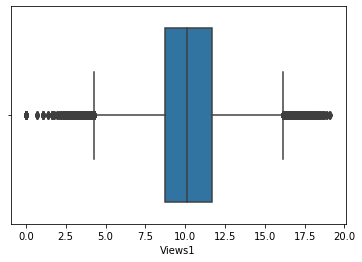

In [42]:
sns.boxplot(data['Views1'])

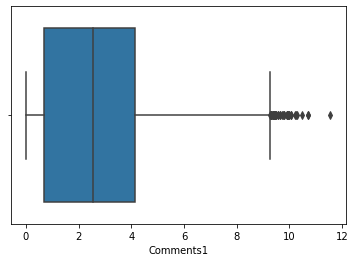

In [43]:
sns.boxplot(data['Comments1'])

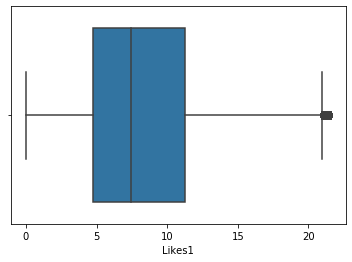

In [44]:
sns.boxplot(data['Likes1'])

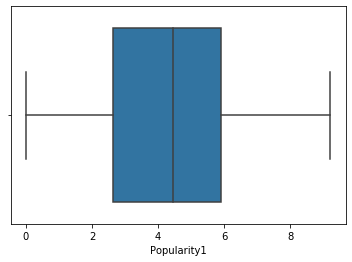

In [45]:
sns.boxplot(data['Popularity1'])

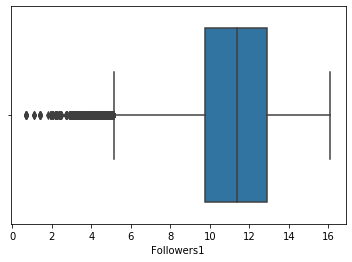

In [46]:
sns.boxplot(data['Followers1'])

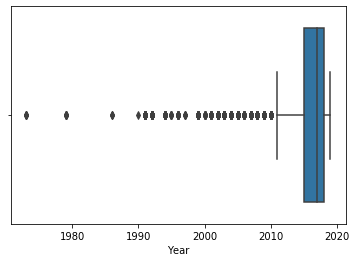

In [55]:
sns.boxplot(data['Year'])

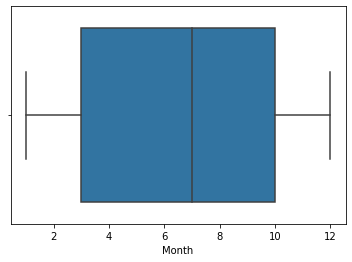

In [56]:
sns.boxplot(data['Month'])

### Clipping the Outliers

In [48]:
data.describe()

,Year,Month,Views1,Comments1,Popularity1,Followers1,Likes1
count,78458.000000,78458.000000,78458.000000,78458.000000,78458.000000,78458.000000,78458.000000
mean,2015.931951,6.523962,10.071826,2.644811,4.247915,11.094879,8.250942
std,2.770140,3.622101,2.730808,2.001315,2.305045,2.438355,4.887189
min,1973.000000,1.000000,0.000000,0.000000,0.000000,0.693147,0.000000
25%,2015.000000,3.000000,8.735123,0.693147,2.639057,9.781376,4.762203
50%,2017.000000,7.000000,10.142012,2.564949,4.465908,11.381483,7.416860
75%,2018.000000,10.000000,11.696373,4.127134,5.916202,12.883233,11.226701
max,2019.000000,12.000000,19.110848,11.552944,9.210340,16.096783,21.543629


In [53]:
tf=8.74
sf=11.70
IQR=sf-tf
LB= tf-1.5*(IQR)
UB=sf+1.5*(IQR)
data['Views1']= np.clip(data['Views1'],a_min=LB,a_max=UB)

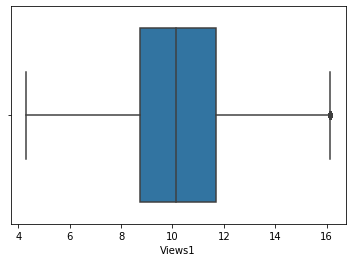

In [54]:
sns.boxplot(data['Views1'])

In [51]:
tf=9.781
sf=12.883
IQR=sf-tf
LB= tf-1.5*(IQR)
UB=sf+1.5*(IQR)
data['Followers1']= np.clip(data['Followers1'],a_min=LB,a_max=UB)

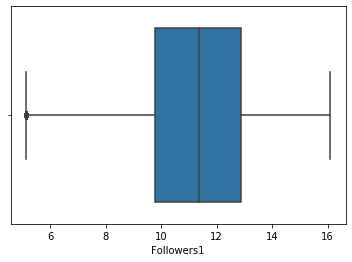

In [52]:
sns.boxplot(data['Followers1'])

In [60]:
data['Comments1']= np.clip(data['Comments1'],a_min=0.69,a_max=4.127)
data['Likes1']= np.clip(data['Likes1'],a_min=4.76,a_max=11.22)
data['Year']= np.clip(data['Year'],a_min=2014.0,a_max=2019.0)

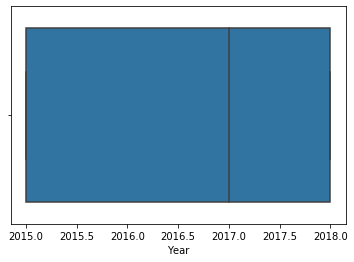

In [61]:
sns.boxplot(data['Year'])

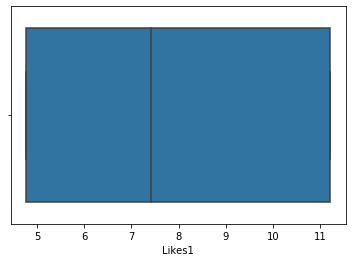

In [59]:
sns.boxplot(data['Likes1'])

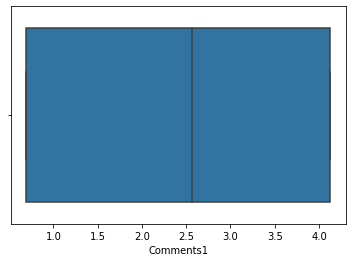

In [62]:
sns.boxplot(data['Comments1'])

In [63]:
data.describe()

,Year,Month,Views1,Comments1,Popularity1,Followers1,Likes1
count,78458.000000,78458.000000,78458.000000,78458.000000,78458.000000,78458.000000,78458.000000
mean,2016.496367,6.523962,10.144197,2.486183,4.247915,11.118912,7.781951
std,1.254684,3.622101,2.471611,1.382631,2.305045,2.369860,2.626176
min,2015.000000,1.000000,4.300000,0.690000,0.000000,5.128000,4.760000
25%,2015.000000,3.000000,8.735123,0.693147,2.639057,9.781376,4.762203
50%,2017.000000,7.000000,10.142012,2.564949,4.465908,11.381483,7.416860
75%,2018.000000,10.000000,11.696373,4.127000,5.916202,12.883233,11.220000
max,2018.000000,12.000000,16.140000,4.127000,9.210340,16.096000,11.220000


### Encoding the Genre Feature

In [64]:
data['Genre'].value_counts()

danceedm                22633
electronic              18331
all-music               10277
rbsoul                   5411
latin                    4562
trap                     4055
rock                     4000
deephouse                2423
pop                      1787
dubstep                  1100
ambient                   847
classical                 767
drumbass                  671
metal                     523
disco                     374
country                   336
alternativerock           156
hiphoprap                 100
reggaeton                  55
folksingersongwriter       39
indie                      11
Name: Genre, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder() 
data['Genre']= x1.fit_transform(data['Genre']) 
data.head()

,Genre,Year,Month,Views1,Comments1,Popularity1,Followers1,Likes1
0,5,2018,3,9.548097,1.609438,4.584967,11.691607,7.931710
1,5,2016,6,7.559559,2.890372,2.890372,7.669495,4.760000
2,5,2015,5,9.176680,2.484907,4.521789,10.010052,6.782423
3,17,2017,6,11.635470,1.098612,4.343805,12.883233,11.220000
4,5,2016,9,11.608463,4.127000,6.551080,12.211214,11.220000


### Scaling the Data

### Using Standard Scaler 

In [69]:
sc=StandardScaler()  
sc_data=sc.fit_transform(data)
sc_data=pd.DataFrame(sc_data)
sc_data.columns=data.columns
sc_data.head()

,Genre,Year,Month,Views1,Comments1,Popularity1,Followers1,Likes1
0,-0.629776,1.198423,-0.972912,-0.241180,-0.634118,0.146225,0.241659,0.057026
1,-0.629776,-0.395614,-0.144658,-1.045737,0.292335,-0.588948,-1.455545,-1.150711
2,-0.629776,-1.192633,-0.420742,-0.391454,-0.000923,0.118816,-0.467904,-0.380604
3,1.385231,0.401405,-0.144658,0.603365,-1.003579,0.041601,0.744488,1.309155
4,-0.629776,-0.395614,0.683596,0.592438,1.186743,0.999191,0.460917,1.309155


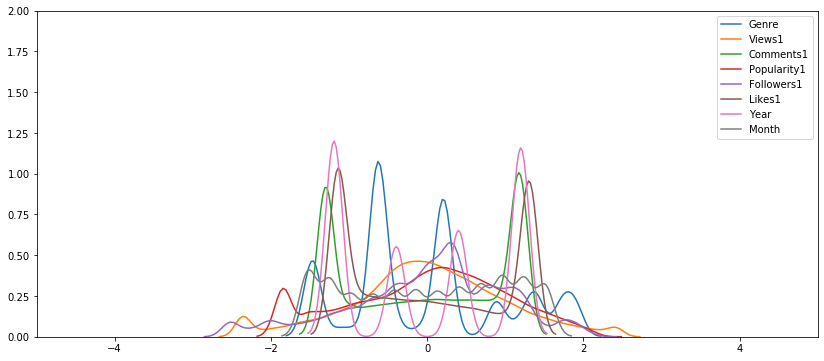

In [70]:
plt.figure(figsize=(14,6))
plt.xlim(-5,5)
plt.ylim(0,2)
sns.kdeplot(sc_data['Genre'])
sns.kdeplot(sc_data['Views1'])
sns.kdeplot(sc_data['Comments1'])
sns.kdeplot(sc_data['Popularity1'])
sns.kdeplot(sc_data['Followers1'])
sns.kdeplot(sc_data['Likes1'])
sns.kdeplot(sc_data['Year'])
sns.kdeplot(sc_data['Month'])

### Using Robust Scaler

In [71]:
rbsc= RobustScaler()
rbsc_data= rbsc.fit_transform(data)
rbsc_data=pd.DataFrame(rbsc_data)
rbsc_data.columns=data.columns

In [72]:
rbsc_data.head()

,Genre,Year,Month,Views1,Comments1,Popularity1,Followers1,Likes1
0,-0.444444,0.333333,-0.571429,-0.200562,-0.278262,0.036330,0.099980,0.079725
1,-0.444444,-0.333333,-0.142857,-0.872082,0.094769,-0.480765,-1.196699,-0.411419
2,-0.444444,-0.666667,-0.285714,-0.325988,-0.023310,0.017052,-0.442132,-0.098244
3,0.888889,0.000000,-0.142857,0.504334,-0.427024,-0.037259,0.484145,0.588922
4,-0.444444,-0.333333,0.285714,0.495213,0.454897,0.636277,0.267495,0.588922


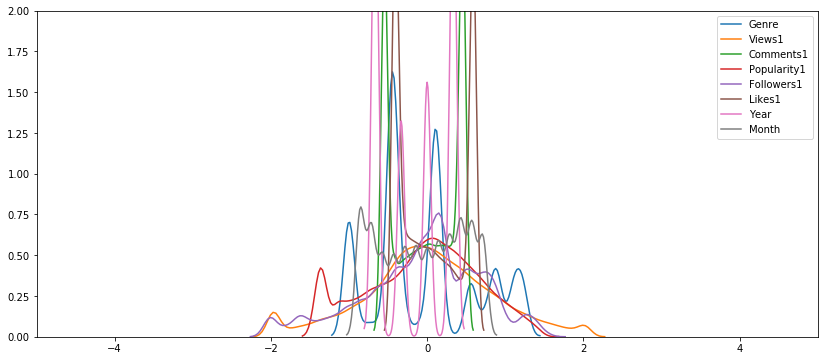

In [73]:
plt.figure(figsize=(14,6))
plt.xlim(-5,5)
plt.ylim(0,2)
sns.kdeplot(rbsc_data['Genre'])
sns.kdeplot(rbsc_data['Views1'])
sns.kdeplot(rbsc_data['Comments1'])
sns.kdeplot(rbsc_data['Popularity1'])
sns.kdeplot(rbsc_data['Followers1'])
sns.kdeplot(rbsc_data['Likes1'])
sns.kdeplot(rbsc_data['Year'])
sns.kdeplot(rbsc_data['Month'])

### Standard Scaler performance better than Robust for this Dataset

### Splitting into Train-Test Sets

In [74]:
X= sc_data[['Comments1','Popularity1','Followers1','Likes1','Genre','Year','Month']]

In [75]:
Y= data[['Views1']]

In [76]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

## Linear Regression

In [77]:
reg= LinearRegression()
reg=reg.fit(x_train,y_train)
print('Coeff: ',reg.coef_)
print('Intercept: ',reg.intercept_)

Coeff:  [[-0.04609833  2.03528991  0.17647593  0.00966744 -0.00652953 -0.1150016
   0.03603735]]
Intercept:  [10.14784821]


In [78]:
y_pred=reg.predict(x_test)

In [79]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
lin_r2= r2_score(y_test,y_pred)
print("Regressor Score =",lin_r2)

RMSE= 1.2828944958001964
Regressor Score = 0.7336346258771543


Text(0.5, 1.0, 'Residual Plot')

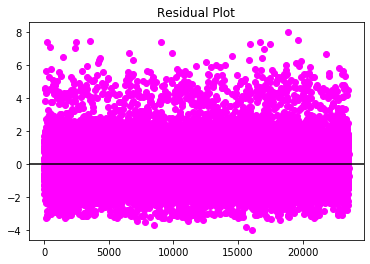

In [80]:

x=[i for i in range(1,len(y_pred)+1)]

x_plot= plt.scatter(x,(y_test-y_pred),color='magenta')
plt.axhline(y=0,color='black')  #plt.plot(x,[0]*len(y_pred),color='black')  
plt.title('Residual Plot')

## Ridge Regression

In [81]:
ridgeReg= Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(x_train,y_train)
print('Ridge Regression Coeff: ',ridgeReg.coef_)
print('Ridge Regression Intercept: ',ridgeReg.intercept_)

Ridge Regression Coeff:  [[ 0.007406    1.95652451  0.1861458   0.02377427 -0.010861   -0.11117877
   0.036845  ]]
Ridge Regression Intercept:  [10.14781973]


In [82]:
y_pred=ridgeReg.predict(x_test)

In [83]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
ridge_r2= r2_score(y_test,y_pred)
print("Regressor Score =",ridge_r2)

RMSE= 1.2837997966554495
Regressor Score = 0.733258560838645


## Lasso Regression

In [84]:
lassoReg= Lasso(alpha=0.1, normalize= True)  
lassoReg.fit(x_train,y_train)
print('Lasso Regression Coeff: ',lassoReg.coef_)
print('Lasso Regression Intercept: ',lassoReg.intercept_)

Lasso Regression Coeff:  [ 0.  0.  0.  0. -0. -0.  0.]
Lasso Regression Intercept:  [10.14732919]


In [85]:
y_pred=lassoReg.predict(x_test)

In [86]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
lasso_r2= r2_score(y_test,y_pred)
print("Regressor Score =",lasso_r2)

RMSE= 2.485741077820961
Regressor Score = -1.764580054874898e-05


## Random Forest Regressor

In [87]:
rfReg=RandomForestRegressor()
rfReg.fit(x_train,y_train)
y_pred= rfReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [88]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
RF_r2= r2_score(y_test,y_pred)
print("Regressor Score =",RF_r2)

RMSE= 0.578974981911634
Regressor Score = 0.945748034043536


## AdaBoostRegressor

In [89]:
AdaBoostReg= AdaBoostRegressor(n_estimators=20)
AdaBoostReg.fit(x_train,y_train)
y_pred= AdaBoostReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Ada_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Ada_r2)

RMSE= 1.071882326011029
Regressor Score = 0.8140526022782395


## Bagging Regressor

In [91]:
BagReg= BaggingRegressor()
BagReg.fit(x_train,y_train)
y_pred=BagReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [92]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Bag_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Bag_r2)

RMSE= 0.5820504801242337
Regressor Score = 0.9451701334931936


## Bayesian Ridge

In [93]:
BayRidge= BayesianRidge()
BayRidge.fit(x_train,y_train)
y_pred=BayRidge.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Bay_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Bay_r2)

RMSE= 1.2828961813707573
Regressor Score = 0.7336339259319453


## Huber Regressor

In [95]:
hubReg= HuberRegressor()
hubReg.fit(x_train,y_train)
y_pred= hubReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Hub_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Hub_r2)

RMSE= 1.2972525089114622
Regressor Score = 0.7276389978483093


## Model Comparison

In [97]:
Model_comparison=pd.DataFrame([lin_r2,ridge_r2,lasso_r2,RF_r2,Ada_r2,Bag_r2,Bay_r2,Hub_r2],['Linear','Ridge','Lasso','RandomForest','AdaBoost','Bagging','Bayesian','Huber'])
Model_comparison.columns=['Regressor Score']
Model_comparison

,Regressor Score
Linear,0.733635
Ridge,0.733259
Lasso,-0.000018
RandomForest,0.945748
AdaBoost,0.814053
Bagging,0.945170
Bayesian,0.733634
Huber,0.727639


Text(0.5, 1.0, 'Model Comparison')

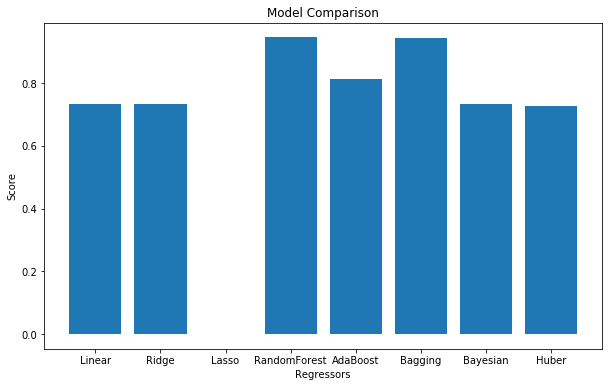

In [98]:
plt.figure(figsize=(10,6))
plt.bar(Model_comparison.index,Model_comparison['Regressor Score'])
plt.xlabel('Regressors')
plt.ylabel('Score')
plt.title('Model Comparison')

### Test Data Analysis & Prediction

In [99]:
test= pd.read_csv("Data_Test.csv")
test.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
0,562546,L2Share♫79,all-music,AU,엔플라잉 N.Flying - Rooftop (옥탑방),2019-01-02 09:49:19.000000,26,"5,428",118,2568
1,907584,Morgan Page,danceedm,AU,Morgan Page - In The Air - Episode 246,2015-03-09 17:30:10.000000,18,738,195,155645
2,213013,Dirty Workz,danceedm,AU,Outlander - Devotion (Official HQ Preview),2013-09-18 16:09:03.000000,18,386,96,29446
3,340312,Gucci Mane,all-music,AU,Freaky Gurl,2007-08-14 00:00:00.000000,1,388,19,799410
4,41854,Angga Kecap,rock,AU,Radical Nusantara - Teman,2018-08-10 16:28:54.000000,0,79,1,2


In [100]:
test['Timestamp']= pd.to_datetime(test['Timestamp'],format='%Y-%m-%d')

test['Year']= test['Timestamp'].dt.year

test['Month']= test['Timestamp'].dt.month

In [101]:
test.drop(['Unique_ID','Name','Timestamp','Country'],inplace=True,axis=1)

In [102]:
test['Likes']= test['Likes'].str.replace(',','')
test['Likes']= test['Likes'].str.replace('.','')
test['Likes']= test['Likes'].str.replace('K','')
test['Likes']= test['Likes'].str.replace('M','')

test['Likes']= test['Likes'].astype('int')

test['Popularity']= test['Popularity'].str.replace(',','')
test['Popularity']= test['Popularity'].str.replace('.','')
test['Popularity']= test['Popularity'].str.replace('K','')

test['Popularity']= test['Popularity'].astype('int')

In [103]:
test['Comments1']= np.log(test['Comments']+1)
test['Popularity1']=np.log(test['Popularity']+1)
test['Followers1']=np.log(test['Followers']+1)
test['Likes1']=(test['Likes'])**(1/3)

In [104]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder() 
test['Genre']= x1.fit_transform(test['Genre']) 
test.head()

,Genre,Song_Name,Comments,Likes,Popularity,Followers,Year,Month,Comments1,Popularity1,Followers1,Likes1
0,0,엔플라잉 N.Flying - Rooftop (옥탑방),26,5428,118,2568,2019,1,3.295837,4.779123,7.851272,17.574377
1,5,Morgan Page - In The Air - Episode 246,18,738,195,155645,2015,3,2.944439,5.278115,11.955339,9.036886
2,5,Outlander - Devotion (Official HQ Preview),18,386,96,29446,2013,9,2.944439,4.574711,10.290347,7.281079
3,0,Freaky Gurl,1,388,19,799410,2007,8,0.693147,2.995732,13.591630,7.293633
4,19,Radical Nusantara - Teman,0,79,1,2,2018,8,0.000000,0.693147,1.098612,4.290840


In [105]:
test.drop(['Song_Name', 'Comments', 'Likes', 'Popularity', 'Followers'],inplace=True,axis=1)

In [106]:
test.columns

Index(['Genre', 'Year', 'Month', 'Comments1', 'Popularity1', 'Followers1',
       'Likes1'],
      dtype='object')

In [107]:
sc=StandardScaler()  
sc_data1=sc.fit_transform(test)
sc_data1=pd.DataFrame(sc_data1)
sc_data1.columns=test.columns
sc_data1.head()

,Genre,Year,Month,Comments1,Popularity1,Followers1,Likes1
0,-1.472236,1.094429,-1.520498,0.328799,0.229371,-1.343302,1.901883
1,-0.629021,-0.325596,-0.967920,0.152575,0.446900,0.343413,0.150781
2,-0.629021,-1.035608,0.689814,0.152575,0.140260,-0.340876,-0.209348
3,-1.472236,-3.165644,0.413525,-0.976435,-0.548075,1.015906,-0.206774
4,1.731980,0.739423,0.413525,-1.324045,-1.551856,-4.118552,-0.822669


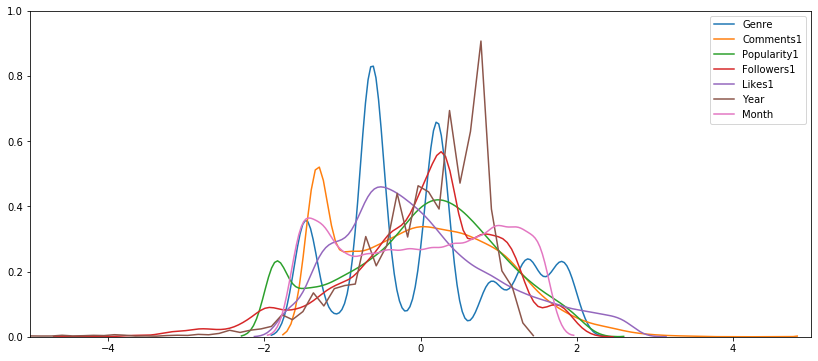

In [108]:
plt.figure(figsize=(14,6))
plt.xlim(-5,5)
plt.ylim(0,1)
sns.kdeplot(sc_data1['Genre'])
sns.kdeplot(sc_data1['Comments1'])
sns.kdeplot(sc_data1['Popularity1'])
sns.kdeplot(sc_data1['Followers1'])
sns.kdeplot(sc_data1['Likes1'])
sns.kdeplot(sc_data1['Year'])
sns.kdeplot(sc_data1['Month'])

### Prediction using Random Forest Regressor

In [109]:
pred= rfReg.predict(sc_data1)

In [110]:
pred

array([13.47842598, 10.24093848, 10.16641927, ...,  9.02517859,
       11.09480282, 10.02515698])

In [111]:
test= pd.read_csv("Data_Test.csv")

In [112]:
pred1=pd.DataFrame(pred)
pred1

,0
0,13.478426
1,10.240938
2,10.166419
3,9.027421
4,14.325979
...,...
19610,10.154024
19611,9.519075
19612,9.025179
19613,11.094803


In [113]:
Submission1=pd.concat((test['Unique_ID'],pred1),axis=1)
Submission1.columns=['Unique_ID','Views']
Submission1.set_index(['Unique_ID'],inplace=True)

In [114]:
Submission1.head()

,Views
Unique_ID,
562546,13.478426
907584,10.240938
213013,10.166419
340312,9.027421
41854,14.325979


In [115]:
Submission1.to_csv("Submission6.csv")

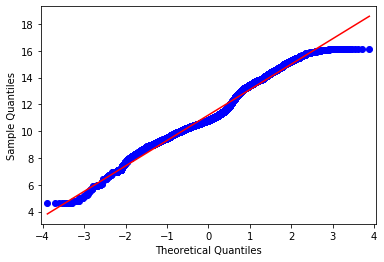

In [116]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(pred, line='s')
pyplot.show()